In [1]:
#three observations or inferences that can be made from the data:

#1: 

#  Due to the correlation coefficient being positive and quite close to 1, 
#  we can say that on average, the higher the weight of a mouse,
#  the higher the tumor volume. This can be seen from the linear regression model.

#2:

# Mice under the drug regimen of Infubinol and Ceftamin, seemed to on average,
# have a higher tumor volume. This can be seen from the blox pot.
# The third quartile, first quartile, minimum , and maximum can be
# seen to be comparatively higher in these 2 drug regimens,
# compared to the rest

#3:

#  For the Capomulin treatment on the mouse l509, we see that tumor volume 
#  had continously increase and was greatest after  approximately 20 days and
#  then quickly became smaller and had a small spike upwards but became smaller until the 35th
# day and slowly increased after this day. We can say that for this treatment 
# the tumor volume peaked and was greatest at the 20th day


In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path


# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata , on = "Mouse ID", how = "left")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
number_mice = combined_df["Mouse ID"].unique()
len(number_mice)

249

In [4]:
duplicates = combined_df[combined_df.duplicated(keep=False)]
duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicates


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]

In [7]:
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
total_mice = cleaned_df["Mouse ID"].unique()
len(total_mice)

248

In [9]:
regimen_df = cleaned_df.groupby(["Drug Regimen"])
regimen_mean = regimen_df.mean()["Tumor Volume (mm3)"]
regimen_median = regimen_df.median()["Tumor Volume (mm3)"]
regimen_variance = regimen_df.var()["Tumor Volume (mm3)"]
regimen_std_dev = regimen_df.std()["Tumor Volume (mm3)"]
regimen_SEM = regimen_df.sem()["Tumor Volume (mm3)"]

In [10]:
regimen_summary = pd.DataFrame({
    "Mean": regimen_mean,
    "Median": regimen_median,
    "Variance":regimen_variance,
    "Standard Deviation": regimen_std_dev,
    "SEM": regimen_SEM
})
regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
regimen_df.agg({
    "Tumor Volume (mm3)": ["mean", "median", "var","std", "sem"]
})
# Using the aggregation method, produce the same summary statistics in a single line.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [12]:
timepoint_count = pd.DataFrame(regimen_df["Timepoint"].count())
timepoint_count

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


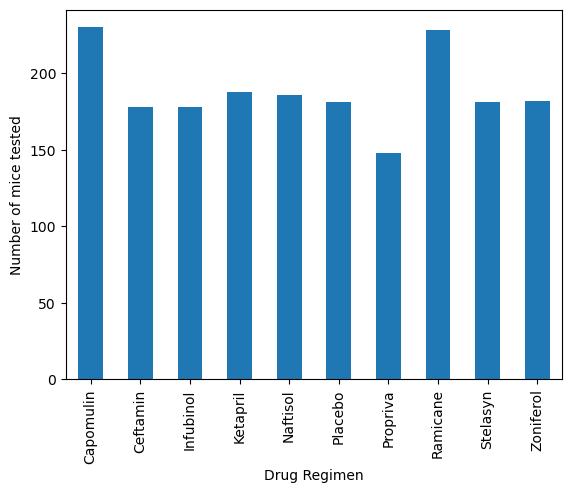

In [13]:
pandas_timecount_bar_graph = timepoint_count.plot(kind = "bar", legend = False).set_ylabel("Number of mice tested")

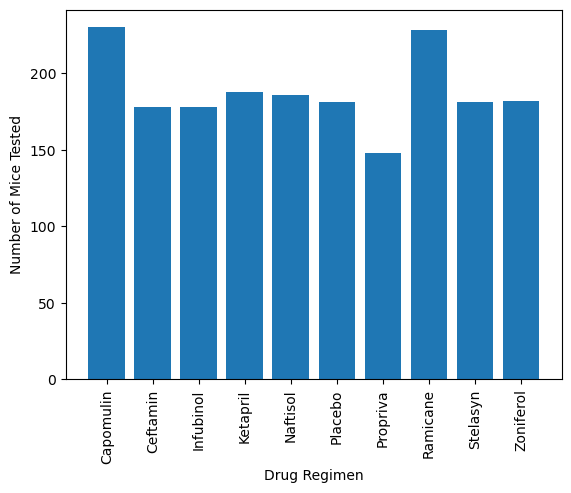

In [14]:
x_axis = list(timepoint_count.index.values)
plt.bar(x_axis,timepoint_count["Timepoint"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

In [15]:
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
Gender_count = pd.DataFrame(round(cleaned_df["Sex"].value_counts(normalize = True)*100,2))
Gender_count

,Sex
Male,50.96
Female,49.04


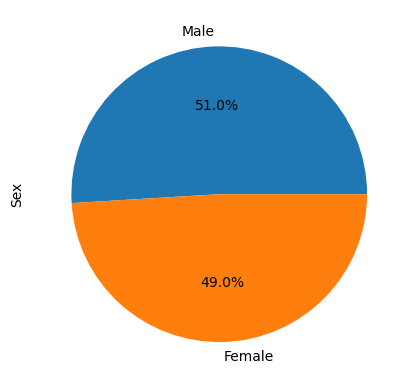

In [17]:
sex_pie_graph = Gender_count.plot.pie(y="Sex", legend = False,autopct='%1.1f%%')

<function matplotlib.pyplot.show(close=None, block=None)>

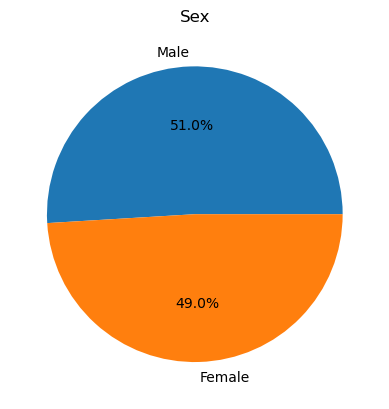

In [18]:
labels = list(Gender_count.index.values)
plt.pie(Gender_count["Sex"], labels = labels,autopct='%1.1f%%')
plt.title("Sex")
plt.show

In [19]:
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
 # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
highest_timepoint_df = pd.DataFrame(cleaned_df.groupby(["Mouse ID"]).max()["Timepoint"])
#highest_timepoint_df = highest_timepoint_df.rename(columns = {'Timepoint':'Last Timepoint'})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
highest_timepoint_df
highest_timepoint_df.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [21]:
final_timepoint_df = pd.merge(cleaned_df,highest_timepoint_df, on = ["Mouse ID","Timepoint"],how = "right")
final_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
desired_regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
#empty list to fill with volume
df1 = []
for drug in desired_regimens:
    desired_drug_dataframe = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]    
    quartiles = desired_drug_dataframe.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    for volume in desired_drug_dataframe:
        if(volume < lower_bound or volume > upper_bound):
            print(volume)
            print("The drug with an outlier is " +drug)
            
    df1.append(desired_drug_dataframe)


36.3213458
The drug with an outlier is Infubinol


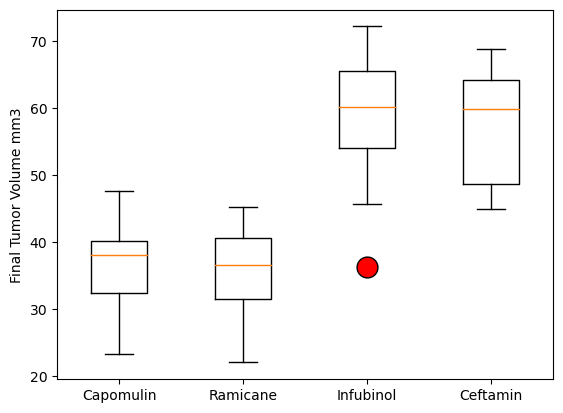

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x_axis = desired_regimens
plt.boxplot(df1, labels = x_axis,flierprops={'marker': 'o', 'markersize': 15, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volume mm3')
plt.show()

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", ["Mouse ID","Tumor Volume (mm3)", "Timepoint", "Weight (g)"]]
specific_mouse_df = Capomulin_df.loc[cleaned_df["Mouse ID"] == "l509", :]
specific_mouse_df


,Mouse ID,Tumor Volume (mm3),Timepoint,Weight (g)
231,l509,45.000000,0,21
253,l509,45.851193,5,21
539,l509,46.759074,10,21
881,l509,47.488599,15,21
982,l509,48.070452,20,21
1146,l509,44.006257,25,21
1414,l509,44.708055,30,21
1499,l509,40.207288,35,21
1723,l509,40.770813,40,21
1771,l509,41.483008,45,21


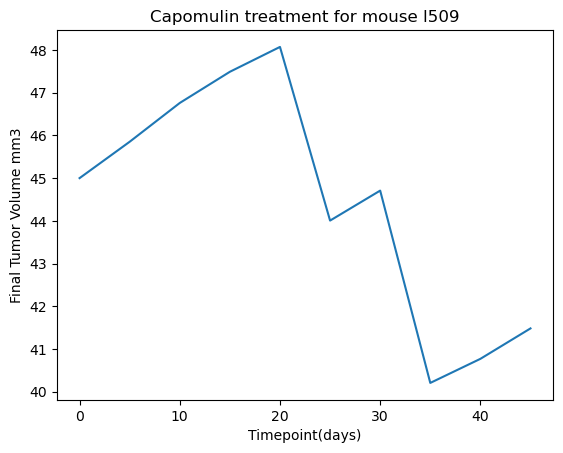

In [25]:
x_axis =list(specific_mouse_df["Timepoint"])
plt.plot(x_axis, specific_mouse_df["Tumor Volume (mm3)"])
plt.ylabel('Final Tumor Volume mm3')
plt.xlabel('Timepoint(days)')
plt.title("Capomulin treatment for mouse l509")
plt.show()

In [26]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df.head()

averages = Capomulin_df.groupby(["Mouse ID"]).mean()
averages = averages.loc[:,["Tumor Volume (mm3)","Weight (g)"]]
averages

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


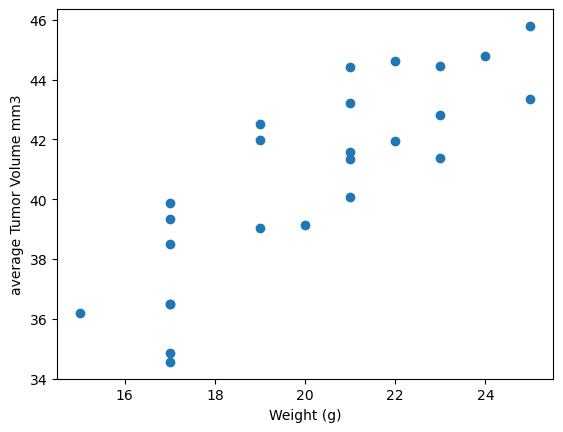

In [27]:
x_axis = list(averages["Weight (g)"])
plt.scatter(x_axis,averages["Tumor Volume (mm3)"])
plt.ylabel('average Tumor Volume mm3')
plt.xlabel('Weight (g)')
plt.title("")
plt.show()

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(averages["Weight (g)"].corr(averages["Tumor Volume (mm3)"]),2)
print("The correlation coefficient between mouse weight and average tumor volume is " + str(correlation))

The correlation coefficient between mouse weight and average tumor volume is 0.84


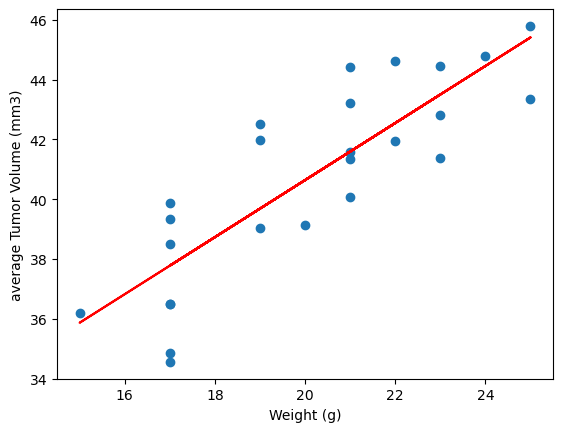

In [29]:
# Generate a scatter plot of year versus number of petrol-electric cars
weight = averages["Weight (g)"]
tumor = averages["Tumor Volume (mm3)"]

# Perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, _, _, _ = st.linregress(weight, tumor)
line_fit = lambda x: pe_slope * x + pe_int

plt.plot(weight, line_fit(weight), color='red')
x_axis = list(averages["Weight (g)"])
plt.scatter(x_axis,averages["Tumor Volume (mm3)"])
plt.ylabel('average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

In [30]:
#inferences/observations at top